In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
import spacy
import os
pd.options.mode.chained_assignment = None
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/ashok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
bag_size = 2000
text_file_prefix = 'tweet'
text_field = 'text'
hashtag_file_prefix = 'hashtag'
hashtag_field = 'hashtag'
other_file_prefix = 'others'

In [3]:
csvname="filtered_dataset/"+text_file_prefix+".csv" #changed
# csvname=file_prefix+".csv" #changed
text_data_orig=pd.read_csv(csvname)
text_data=text_data_orig.copy()
text_data.drop(text_data.columns[text_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
rows=len(text_data)

In [4]:
csvname="filtered_dataset/"+hashtag_file_prefix+".csv" #changed
# csvname=file_prefix+".csv" #changed
hashtag_data_orig=pd.read_csv(csvname)
hashtag_data=hashtag_data_orig.copy()
hashtag_data.drop(hashtag_data.columns[hashtag_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
rows=len(hashtag_data)

In [5]:
csvname="processed_dataset/"+other_file_prefix+".csv" #changed
# csvname=file_prefix+".csv" #changed
other_data=pd.read_csv(csvname)
other_data=other_data.drop(['class'], axis=1)


In [6]:
def filter_text(in_data, field):
  data = in_data.copy()
  for i in range (0,rows):
    oldtext=data[field][i] 
    newtext=' '.join(re.sub("(@[A-Za-z0-9]+)| (_URL_) | (#[A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",str(oldtext)).split()) # removes hashtags, https links, usernames.
    newtext= re.sub('[^a-zA-Z0-9]'," ",str(newtext)) #removes all other characters other than English Alpha-Numeric Characters
    newtext=newtext.lower()
    newtext=newtext.split()
    data[field][i]=newtext
  return data

In [7]:
filtered_text_data=filter_text(text_data, text_field)
filtered_text_data

,text,class
0,"[much, of, the, focus, on, recently, has, been...",0
1,"[icymi, the, first, probable, case, of, monkey...",0
2,"[who, outbreak, not, yet, a, global, public, h...",0
3,"[according, to, the, cdc, monkeypox, is, usual...",0
4,"[lgbtq, advocates, and, health, care, organiza...",0
...,...,...
5782,"[an, effort, has, been, to, perpetuate, varian...",1
5783,"[an, effort, has, been, to, perpetuate, varian...",1
5784,"[it, seems, we, have, a, new, variant, coming,...",1
5785,"[news, from, what, i, gather, monkey, pox, has...",1


In [8]:
filtered_hashtag_data=filter_text(hashtag_data, hashtag_field)
filtered_hashtag_data

,hashtag,class
0,"[aidsmaplive, monkeypox]",0
1,[nan],0
2,"[healthcare, monkeypox]",0
3,[nan],0
4,[nan],0
...,...,...
5782,[nan],1
5783,[nan],1
5784,[nan],1
5785,[nan],1


In [9]:
filtered_data = filtered_text_data.copy()
filtered_data[text_field] += filtered_hashtag_data[hashtag_field]
filtered_data

,text,class
0,"[much, of, the, focus, on, recently, has, been...",0
1,"[icymi, the, first, probable, case, of, monkey...",0
2,"[who, outbreak, not, yet, a, global, public, h...",0
3,"[according, to, the, cdc, monkeypox, is, usual...",0
4,"[lgbtq, advocates, and, health, care, organiza...",0
...,...,...
5782,"[an, effort, has, been, to, perpetuate, varian...",1
5783,"[an, effort, has, been, to, perpetuate, varian...",1
5784,"[it, seems, we, have, a, new, variant, coming,...",1
5785,"[news, from, what, i, gather, monkey, pox, has...",1


In [10]:
def porterstemming(in_data):
  data = in_data.copy()
  for i in range (0,rows):
    ps=PorterStemmer()
    oldtext=data[text_field][i]
    newtext= [ps.stem(word) for word in oldtext if word not in set(stopwords.words('english'))]
    newtext=' '.join(newtext)
    data[text_field][i]=newtext
  return data

In [11]:
portered_stemmed_data=porterstemming(filtered_data)
portered_stemmed_data

,text,class
0,much focu recent affect peopl richer countri c...,0
1,icymi first probabl case monkeypox west virgin...,0
2,outbreak yet global public health emerg via ur...,0
3,accord cdc monkeypox usual spread prolong dire...,0
4,lgbtq advoc health care organ rais alarm thurs...,0
...,...,...
5782,effort perpetu variant fake virus sarscov2 cov...,1
5783,effort perpetu variant fake virus sarscov2 cov...,1
5784,seem new variant come cours forget evil monkey...,1
5785,news gather monkey pox shingl side effect vacc...,1


In [12]:
def lemmatization(in_data):
  data = in_data.copy()
  spc = spacy.load("en_core_web_sm")
  for i in range (0,rows):
    oldtext = ' '.join(item for item in data[text_field][i])
    doc = spc(oldtext)
    newtext=' '.join([str(token) for token in doc if token not in set(stopwords.words("english"))])
    newtext = re.sub(r'\s+', ' ', newtext)
    data[text_field][i]=newtext
  return data

In [13]:
lemmatization_data=lemmatization(filtered_data)
lemmatization_data

,text,class
0,much of the focus on recently has been on how ...,0
1,icymi the first probable case of monkeypox in ...,0
2,who outbreak not yet a global public health em...,0
3,according to the cdc monkeypox is usually spre...,0
4,lgbtq advocates and health care organizations ...,0
...,...,...
5782,an effort has been to perpetuate variants of f...,1
5783,an effort has been to perpetuate variants of f...,1
5784,it seems we have a new variant coming out and ...,1
5785,news from what i gather monkey pox has been sh...,1


In [14]:
def create_corpus_and_y(data):
  y=np.array(data["class"])
  corpus=[data[text_field][i] for i in range(len(data)) if len(data)!=0]
  return (y,corpus)

In [15]:
y_portered,portered_corpus=create_corpus_and_y(portered_stemmed_data)
y_lemmatization,lemmatization_corpus=create_corpus_and_y(lemmatization_data)

In [16]:
def count_vec(corpus):
  from sklearn.feature_extraction.text import CountVectorizer
  cv = CountVectorizer(max_features = bag_size)
  X = cv.fit_transform(corpus).toarray()
  return X

In [17]:
def tf_idf_vec(corpus):
  from sklearn.feature_extraction.text import TfidfVectorizer
  vectorizer = TfidfVectorizer(max_features=bag_size) # Add min_df, max_df parameters as well
  vectorizer.fit(corpus)
  X = vectorizer.transform(corpus)
  X=X.toarray()
  return X

In [18]:
X_portered_CV=count_vec(portered_corpus)
X_lemmatization_CV=count_vec(lemmatization_corpus)

In [19]:
def normalize(df):
    for feature in df.columns:
        if feature != 'class':
            feature_min = df[feature].min()
            feature_max = df[feature].max()
            df[feature] = (df[feature] - feature_min) / (feature_max - feature_min)    

    return df

In [20]:
df_portered_CV = pd.DataFrame(X_portered_CV)
df_portered_CV['class'] = y_portered
df_portered_CV = pd.concat([df_portered_CV, other_data], axis=1, join='inner')
df_portered_CV = normalize(df_portered_CV)
df_portered_CV

,0,1,2,3,4,5,6,7,8,9,...,user is verified,user has url,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000877,0.0,0.000137,0.000000,1.670395e-04,0.006849,0.001264,0.000346
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000877,0.0,0.000069,0.000000,3.427383e-03,0.004012,0.045894,0.007349
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.288952e-04,0.005449,0.003881,0.000194
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000438,0.0,0.000069,0.000000,1.034822e-03,0.012964,0.043602,0.009176
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000000,0.0,0.000000,0.000000,3.674146e-03,0.001066,0.054190,0.010338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.807787e-07,0.000455,0.000144,0.000000
5783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.807787e-07,0.000455,0.000144,0.000000
5784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000137,0.000000,2.982848e-06,0.000460,0.002571,0.000000
5785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.599891e-05,0.005378,0.001121,0.000014


In [21]:
df_lemmatization_CV = pd.DataFrame(X_lemmatization_CV)
df_lemmatization_CV['class'] = y_lemmatization
df_lemmatization_CV = pd.concat([df_lemmatization_CV, other_data], axis=1, join='inner')
df_lemmatization_CV = normalize(df_lemmatization_CV)
df_lemmatization_CV

,0,1,2,3,4,5,6,7,8,9,...,user is verified,user has url,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000877,0.0,0.000137,0.000000,1.670395e-04,0.006849,0.001264,0.000346
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000877,0.0,0.000069,0.000000,3.427383e-03,0.004012,0.045894,0.007349
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.288952e-04,0.005449,0.003881,0.000194
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000438,0.0,0.000069,0.000000,1.034822e-03,0.012964,0.043602,0.009176
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000000,0.0,0.000000,0.000000,3.674146e-03,0.001066,0.054190,0.010338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.807787e-07,0.000455,0.000144,0.000000
5783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.807787e-07,0.000455,0.000144,0.000000
5784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000137,0.000000,2.982848e-06,0.000460,0.002571,0.000000
5785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.599891e-05,0.005378,0.001121,0.000014


In [22]:
X_portered_TF_IDF=tf_idf_vec(portered_corpus)
X_lemmatization_TF_IDF=tf_idf_vec(lemmatization_corpus)

In [23]:
df_portered_TF_IDF = pd.DataFrame(X_portered_TF_IDF)
df_portered_TF_IDF['class'] = y_portered
df_portered_TF_IDF = pd.concat([df_portered_TF_IDF, other_data], axis=1, join='inner')
df_portered_TF_IDF = normalize(df_portered_TF_IDF)
df_portered_TF_IDF

,0,1,2,3,4,5,6,7,8,9,...,user is verified,user has url,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000877,0.0,0.000137,0.000000,1.670395e-04,0.006849,0.001264,0.000346
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000877,0.0,0.000069,0.000000,3.427383e-03,0.004012,0.045894,0.007349
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.288952e-04,0.005449,0.003881,0.000194
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000438,0.0,0.000069,0.000000,1.034822e-03,0.012964,0.043602,0.009176
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000000,0.0,0.000000,0.000000,3.674146e-03,0.001066,0.054190,0.010338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.807787e-07,0.000455,0.000144,0.000000
5783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.807787e-07,0.000455,0.000144,0.000000
5784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000137,0.000000,2.982848e-06,0.000460,0.002571,0.000000
5785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.599891e-05,0.005378,0.001121,0.000014


In [24]:
df_lemmatization_TF_IDF = pd.DataFrame(X_lemmatization_TF_IDF)
df_lemmatization_TF_IDF['class'] = y_lemmatization
df_lemmatization_TF_IDF = pd.concat([df_lemmatization_TF_IDF, other_data], axis=1, join='inner')
df_lemmatization_TF_IDF = normalize(df_lemmatization_TF_IDF)
df_lemmatization_TF_IDF

,0,1,2,3,4,5,6,7,8,9,...,user is verified,user has url,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000877,0.0,0.000137,0.000000,1.670395e-04,0.006849,0.001264,0.000346
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000877,0.0,0.000069,0.000000,3.427383e-03,0.004012,0.045894,0.007349
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.288952e-04,0.005449,0.003881,0.000194
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000438,0.0,0.000069,0.000000,1.034822e-03,0.012964,0.043602,0.009176
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000000,0.0,0.000000,0.000000,3.674146e-03,0.001066,0.054190,0.010338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.807787e-07,0.000455,0.000144,0.000000
5783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.807787e-07,0.000455,0.000144,0.000000
5784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000137,0.000000,2.982848e-06,0.000460,0.002571,0.000000
5785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.599891e-05,0.005378,0.001121,0.000014


In [25]:
#write processed dataset to .csv
os.makedirs('processed_dataset', exist_ok=True)
df_portered_CV.to_csv('processed_dataset/'+text_file_prefix+'_portered_CV.csv',index=False) 
df_lemmatization_CV.to_csv('processed_dataset/'+text_file_prefix+'_lemmatization_CV.csv',index=False)

In [26]:
df_portered_TF_IDF.to_csv('processed_dataset/'+text_file_prefix+'_portered_TF_IDF.csv',index=False) 
df_lemmatization_TF_IDF.to_csv('processed_dataset/'+text_file_prefix+'_lemmatization_TF_IDF.csv',index=False)

In [27]:
## PCA starts

In [28]:
from sklearn.decomposition import PCA
def perform_PCA (X_train, y_train, total_components, n_components):
  pca = PCA(n_components=total_components, random_state=0)
  pca.fit(X_train)
  X_pca = pca.transform(X_train)

  print("Variance explained by all", total_components, "principal components =", sum(pca.explained_variance_ratio_ * 100))

  csum = np.cumsum(pca.explained_variance_ratio_ * 100)
  print(csum)
  print ()

  # plot 
  import matplotlib.pyplot as plt
  plt.plot(csum)
  plt.xlabel('Number of components')
  plt.ylabel('Explained variance')
  #plt.savefig('elbow_plot.png', dpi=100)

  # find the number of components
  print (csum[n_components-1])

  x_train_pca=[x[:n_components] for x in X_pca]

  print (len(x_train_pca[0]))
  print ()

  return x_train_pca

In [29]:
# PCA on lemmatization data
y = df_lemmatization_TF_IDF['class']
X_lemmatization_tf = df_lemmatization_TF_IDF.copy()
X_lemmatization_tf.drop ('class', axis=1, inplace=True)

X_lemmatization_cv = df_lemmatization_CV.copy()
X_lemmatization_cv.drop ('class', axis=1, inplace=True)

0.04972650422675286


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Variance explained by all 2011 principal components = 100.00000000000003
[  5.12969739   7.40837292   9.26058776 ... 100.         100.
 100.        ]

95.82661879320925
1250



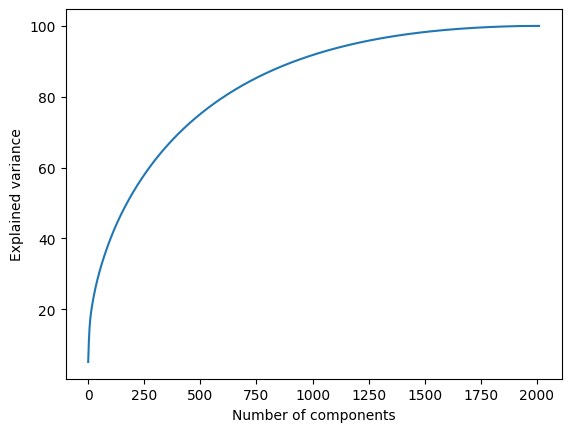

In [30]:
# PCA lemmatization CV
total_components = len(X_lemmatization_cv.columns)
print (100/total_components)
total_components
# X_lemmatization_cv
n_components = 1250
X_lemmatization_cv_PCA = perform_PCA (X_lemmatization_cv, y, total_components, n_components)

0.04972650422675286


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Variance explained by all 2011 principal components = 100.00000000000013
[  7.17099731  10.07517483  12.55726869 ... 100.         100.
 100.        ]

95.93041690031548
1350



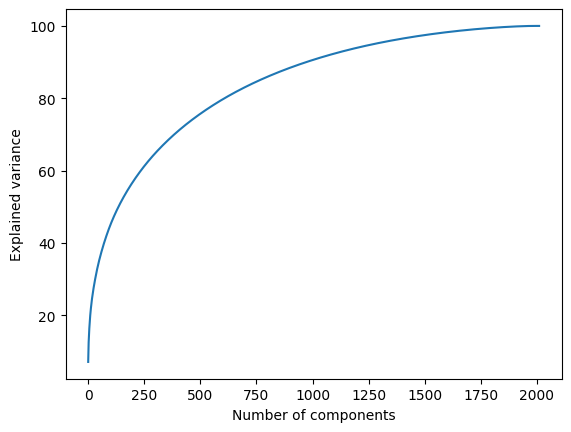

In [31]:
# PCA lemmatization TF IDF
total_components = len(X_lemmatization_tf.columns)
print (100/total_components)
n_components = 1350
X_lemmatization_tf_PCA = perform_PCA (X_lemmatization_tf, y, total_components, n_components)

In [32]:
# def split_data_train_test_split(X,y):
#  from sklearn.model_selection import train_test_split
#  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#  return(X_train, X_test,y_train,y_test)

import math
from sklearn.model_selection import train_test_split

def split_data_train_test_split(X,y):
    X_class = {
        0: [],
        1: []}
    for i in range(len(y)):
        X_class[y[i]].append(X[i])
    X_0_candidate = X_class[0][:len(X_class[1])]
    X_0_add = X_class[0][len(X_class[1]):]
    
    X_candidate = np.concatenate((X_0_candidate, X_class[1]))
    
    y_candidate = np.array([0 for i in range(len(X_0_candidate))])
    y_candidate = np.concatenate((y_candidate,np.array([1 for i in range(len(X_0_candidate))])))

    y_0_add = np.array([0 for i in range(len(X_0_add))])
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_candidate, y_candidate, test_size = 0.2, random_state = 0)

#     X_test = np.concatenate((X_test, X_0_add))
#     y_test = np.concatenate((y_test, y_0_add))
    
    return(X_train, X_test,y_train,y_test)

In [33]:
X_train_lemmatization_cv, X_test_lemmatization_cv,y_train_lemmatization_cv,y_test_lemmatization_cv=split_data_train_test_split(X_lemmatization_cv_PCA,y)
X_train_lemmatization_tf, X_test_lemmatization_tf,y_train_lemmatization_tf,y_test_lemmatization_tf=split_data_train_test_split(X_lemmatization_tf_PCA,y)

In [34]:
y_test_lemmatization_cv

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [35]:
# y

In [36]:
# PCA on portered data
y = df_portered_TF_IDF['class']
X_portered_tf = df_portered_TF_IDF.copy()
X_portered_tf.drop ('class', axis=1, inplace=True)

X_portered_cv = df_portered_CV.copy()
X_portered_cv.drop ('class', axis=1, inplace=True)

0.04972650422675286


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Variance explained by all 2011 principal components = 99.99999999999997
[  5.93110168   8.55516356  10.62361572 ... 100.         100.
 100.        ]

95.8564540502375
1250



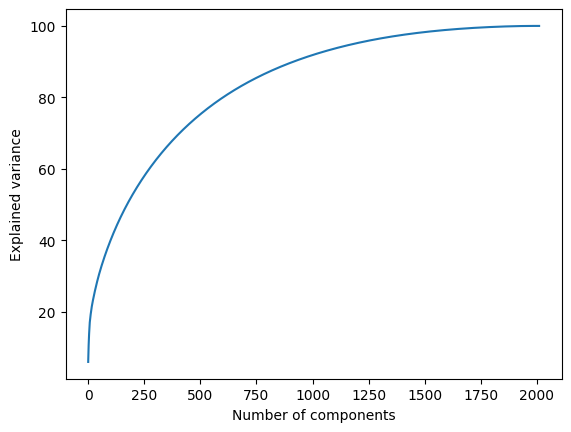

In [37]:
# PCA portered CV
total_components = len(X_portered_cv.columns)
print (100/total_components)
n_components = 1250
X_portered_cv_PCA = perform_PCA (X_portered_cv, y, total_components, n_components)

0.04972650422675286


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Variance explained by all 2011 principal components = 100.00000000000001
[  8.56164492  11.6457755   13.87282356 ... 100.         100.
 100.        ]

95.43323697792158
1350



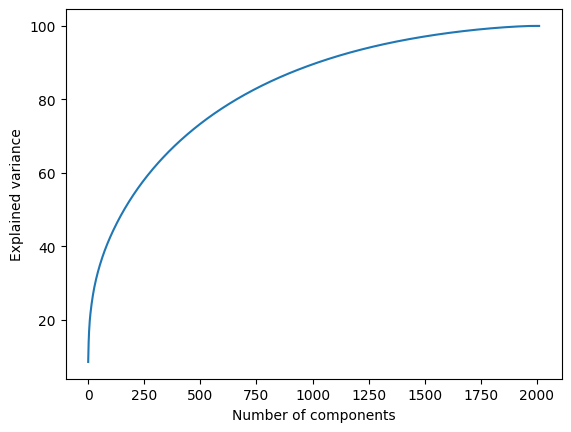

In [38]:
# PCA portered TF IDF
total_components = len(X_portered_tf.columns)
print (100/total_components)
n_components = 1350
X_portered_tf_PCA = perform_PCA (X_portered_tf, y, total_components, n_components)

In [39]:
X_train_portered_cv, X_test_portered_cv,y_train_portered_cv,y_test_portered_cv=split_data_train_test_split(X_portered_cv_PCA,y)
X_train_portered_tf, X_test_portered_tf,y_train_portered_tf,y_test_portered_tf=split_data_train_test_split(X_portered_tf_PCA,y)

In [40]:
y_train_portered_cv

array([1, 0, 1, ..., 0, 0, 1])

In [41]:
y_test_portered_cv

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [42]:


class Data:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

class Result:
    def __init__(self, y_test, y_pred, label=None):
        self.label = label
        self.accuracy = accuracy_score(y_test,y_pred) * 100
        self.precision = precision_score(y_test, y_pred, average='binary') * 100
        self.recall = recall_score(y_test, y_pred, average='binary') * 100
        self.f1 = f1_score(y_test, y_pred, average='binary') * 100
        self.confusion_matrix = confusion_matrix(y_test, y_pred)
        
    def show(self):
        print("Accuracy = ",self.accuracy,"%")
        print("Precision = ",self.precision)
        print("Recall = ",self.recall)
        print("F1 Score = ",self.f1)
        print("Confusion Matrix: \n", self.confusion_matrix)
        
def getResult(data, res):
    result = Result(data.y_test, res)
    result.show()
    return result

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

def getBestModel(data, model, param_grid, cv=10):
    scorer = make_scorer(metrics.f1_score , average='binary')
    grid = GridSearchCV(model, 
                        param_grid,
                        cv=cv,
                        scoring=scorer)


    grid.fit(data.x_train, data.y_train)
    
    return grid

In [55]:
from sklearn.svm import SVC
from sklearn import svm

def runSVM(data):
    svm_param_grid = {'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 10], 
                      'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                      'gamma': [1,0.1,0.01,0.001]
                     } 

    grid = getBestModel(data, svm.SVC(), svm_param_grid, cv=10)

    y_pred = grid.predict(data.x_test)
    getResult(data, y_pred)
    print(grid.best_params_)
    return grid

from sklearn.ensemble import RandomForestClassifier

def runRF(data):
    random_forest_params_grid = {
        'n_estimators': [i for i in range(100, 1000, 100)],
        'criterion': ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'random_state': [0]
    }

    grid = getBestModel(data, RandomForestClassifier(), random_forest_params_grid, 10)

    y_pred = grid.predict(data.x_test)
    getResult(data, y_pred)
    print(grid.best_params_)
    return grid
    
from sklearn.tree import DecisionTreeClassifier

def runDT(data):
    decision_tree_params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [i for i in range(100, 1000, 100)],
        'max_features': ['sqrt', 'log2'],
        'random_state': [0]
    }

    grid = getBestModel(data, DecisionTreeClassifier(), decision_tree_params)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred)

    print(grid.best_params_)
    return grid

from sklearn.neighbors import KNeighborsClassifier

def runKNN(data):

    knn_params_grid = {
        'n_neighbors': [i for i in range(3,20)],
        'p': [1,2],
        'metric' : ['minkowski','euclidean','manhattan', 'chebyshev'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    grid = getBestModel(data, KNeighborsClassifier(), knn_params_grid)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred)

    print(grid.best_params_)
    return grid

from sklearn.naive_bayes import GaussianNB

def runNB(data):

    nb_params_grid = {
    }

    grid = getBestModel(data, GaussianNB(), nb_params_grid)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred)

    print(grid.best_params_)
    return grid


In [44]:
data_lemmatization_cv = Data(X_train_lemmatization_cv, y_train_lemmatization_cv, X_test_lemmatization_cv, y_test_lemmatization_cv)
data_lemmatization_tf = Data(X_train_lemmatization_tf, y_train_lemmatization_tf, X_test_lemmatization_tf, y_test_lemmatization_tf)
data_portered_cv = Data(X_train_portered_cv, y_train_portered_cv, X_test_portered_cv, y_test_portered_cv)
data_portered_tf = Data(X_train_portered_tf, y_train_portered_tf, X_test_portered_tf, y_test_portered_tf)


In [45]:
print('Lemmatization CV')
grid = runSVM(data_lemmatization_cv)

print('Lemmatization TF-IDF')
grid = runSVM(data_lemmatization_tf)

print('Portered CV')
grid = runSVM(data_portered_cv)

print('Portered TF-IDF')
grid = runSVM(data_portered_tf)


Lemmatization CV
Accuracy =  93.22429906542055 %
Precision =  92.09302325581396
Recall =  94.28571428571428
F1 Score =  93.17647058823529
Confusion Matrix: 
 [[201  17]
 [ 12 198]]
{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Lemmatization TF-IDF
Accuracy =  92.99065420560748 %
Precision =  92.05607476635514
Recall =  93.80952380952381
F1 Score =  92.9245283018868
Confusion Matrix: 
 [[201  17]
 [ 13 197]]
{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Portered CV
Accuracy =  92.28971962616822 %
Precision =  92.34449760765551
Recall =  91.9047619047619
F1 Score =  92.12410501193318
Confusion Matrix: 
 [[202  16]
 [ 17 193]]
{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Portered TF-IDF
Accuracy =  93.22429906542055 %
Precision =  93.30143540669856
Recall =  92.85714285714286
F1 Score =  93.07875894988067
Confusion Matrix: 
 [[204  14]
 [ 15 195]]
{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}


In [54]:
print('Lemmatization CV')
grid = runRF(data_lemmatization_cv)

print('Lemmatization TF-IDF')
grid = runRF(data_lemmatization_tf)

print('Portered CV')
grid = runRF(data_portered_cv)

print('Portered TF-IDF')
grid = runRF(data_portered_tf)

Lemmatization CV
Accuracy =  85.98130841121495 %
Precision =  81.25
Recall =  92.85714285714286
F1 Score =  86.66666666666666
Confusion Matrix: 
 [[173  45]
 [ 15 195]]
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 0}
Lemmatization TF-IDF
Accuracy =  88.3177570093458 %
Precision =  82.78688524590164
Recall =  96.19047619047619
F1 Score =  88.98678414096916
Confusion Matrix: 
 [[176  42]
 [  8 202]]
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 700, 'random_state': 0}
Portered CV
Accuracy =  86.91588785046729 %
Precision =  81.55737704918032
Recall =  94.76190476190476
F1 Score =  87.66519823788546
Confusion Matrix: 
 [[173  45]
 [ 11 199]]
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 900, 'random_state': 0}
Portered TF-IDF
Accuracy =  88.55140186915888 %
Precision =  84

In [56]:
print('Lemmatization CV')
grid = runDT(data_lemmatization_cv)

print('Lemmatization TF-IDF')
grid = runDT(data_lemmatization_tf)

print('Portered CV')
grid = runDT(data_portered_cv)

print('Portered TF-IDF')
grid = runDT(data_portered_tf)


Lemmatization CV
Accuracy =  66.1214953271028 %
Precision =  65.25821596244131
Recall =  66.19047619047619
F1 Score =  65.72104018912529
Confusion Matrix: 
 [[144  74]
 [ 71 139]]
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'random_state': 0}
Lemmatization TF-IDF
Accuracy =  72.89719626168224 %
Precision =  73.0392156862745
Recall =  70.95238095238095
F1 Score =  71.98067632850243
Confusion Matrix: 
 [[163  55]
 [ 61 149]]
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'random_state': 0}
Portered CV
Accuracy =  70.32710280373831 %
Precision =  68.94977168949772
Recall =  71.9047619047619
F1 Score =  70.3962703962704
Confusion Matrix: 
 [[150  68]
 [ 59 151]]
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'random_state': 0}
Portered TF-IDF
Accuracy =  75.23364485981308 %
Precision =  74.76190476190476
Recall =  74.76190476190476
F1 Score =  74.76190476190476
Confusion Matrix: 
 [[165  53]
 [ 53 157]]
{'criterion': 'gini', 'm

In [52]:
print('Lemmatization CV')
grid = runKNN(data_lemmatization_cv)

print('Lemmatization TF-IDF')
grid = runKNN(data_lemmatization_tf)

print('Portered CV')
grid = runKNN(data_portered_cv)

print('Portered TF-IDF')
grid = runKNN(data_portered_tf)


Lemmatization CV
Accuracy =  86.21495327102804 %
Precision =  82.12765957446808
Recall =  91.9047619047619
F1 Score =  86.74157303370787
Confusion Matrix: 
 [[176  42]
 [ 17 193]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'p': 2}
Lemmatization TF-IDF
Accuracy =  85.98130841121495 %
Precision =  81.77966101694916
Recall =  91.9047619047619
F1 Score =  86.54708520179372
Confusion Matrix: 
 [[175  43]
 [ 17 193]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 4, 'p': 2}
Portered CV
Accuracy =  86.21495327102804 %
Precision =  84.47488584474885
Recall =  88.09523809523809
F1 Score =  86.24708624708624
Confusion Matrix: 
 [[184  34]
 [ 25 185]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 14, 'p': 2}
Portered TF-IDF
Accuracy =  88.08411214953271 %
Precision =  83.82978723404256
Recall =  93.80952380952381
F1 Score =  88.53932584269663
Confusion Matrix: 
 [[180  38]
 [ 13 197]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p'

In [51]:
print('Lemmatization CV')
grid = runNB(data_lemmatization_cv)

print('Lemmatization TF-IDF')
grid = runNB(data_lemmatization_tf)

print('Portered CV')
grid = runNB(data_portered_cv)

print('Portered TF-IDF')
grid = runNB(data_portered_tf)


Lemmatization CV
Accuracy =  64.48598130841121 %
Precision =  64.2156862745098
Recall =  62.38095238095238
F1 Score =  63.28502415458937
Confusion Matrix: 
 [[145  73]
 [ 79 131]]
{}
Lemmatization TF-IDF
Accuracy =  66.58878504672897 %
Precision =  64.62882096069869
Recall =  70.47619047619048
F1 Score =  67.42596810933941
Confusion Matrix: 
 [[137  81]
 [ 62 148]]
{}
Portered CV
Accuracy =  65.42056074766354 %
Precision =  65.97938144329896
Recall =  60.952380952380956
F1 Score =  63.366336633663366
Confusion Matrix: 
 [[152  66]
 [ 82 128]]
{}
Portered TF-IDF
Accuracy =  67.5233644859813 %
Precision =  66.06334841628959
Recall =  69.52380952380952
F1 Score =  67.74941995359627
Confusion Matrix: 
 [[143  75]
 [ 64 146]]
{}
